In [294]:
# Import Libraries
import pandas as pd # Data Manipulation
import numpy as np # 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from datetime import date
from sklearn.model_selection import train_test_split
import statistics
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')




In [295]:
# Import Excel data into pandas
greeks_data=pd.read_csv("greeks.csv")
greeks_data


,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020
...,...,...,...,...,...,...
612,fd3dafe738fd,A,B,M,B,9/13/2020
613,fd895603f071,A,B,M,B,9/8/2020
614,fd8ef6377f76,A,C,M,B,7/24/2019
615,fe1942975e40,A,C,M,B,1/31/2019


In [296]:
# Import train data
train_data= pd.read_csv("train.csv")
train_data= train_data.round(2)
train_data

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.21,3109.03,85.20,22.39,8.14,0.70,0.03,9.81,5.56,...,7.30,1.74,0.09,11.34,72.61,2003.81,22.14,69.83,0.12,1
1,007255e47698,0.15,978.76,85.20,36.97,8.14,3.63,0.03,13.52,1.23,...,0.17,0.50,0.57,9.29,72.61,27981.56,29.14,32.13,21.98,0
2,013f2bd269f5,0.47,2635.11,85.20,32.36,8.14,6.73,0.03,12.82,1.23,...,7.71,0.98,1.20,37.08,88.61,13676.96,28.02,35.19,0.20,0
3,043ac50845d5,0.25,3819.65,120.20,77.11,8.14,3.69,0.03,11.05,1.23,...,6.12,0.50,0.28,18.53,82.42,2094.26,39.95,90.49,0.16,0
4,044fb8a146ec,0.38,3733.05,85.20,14.10,8.14,3.94,0.05,3.40,102.15,...,8.15,48.50,0.12,16.41,146.11,8524.37,45.38,36.26,0.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.15,3130.06,123.76,9.51,13.02,3.50,0.08,8.55,2.80,...,0.17,1.26,0.07,8.97,217.15,8095.93,24.64,69.19,21.98,0
613,fd895603f071,0.44,5462.03,85.20,46.55,15.97,5.98,0.03,12.62,3.78,...,10.22,1.24,0.43,35.90,496.99,3085.31,29.65,124.81,0.15,0
614,fd8ef6377f76,0.43,2459.11,130.14,55.36,10.01,8.07,0.03,15.41,1.23,...,0.17,0.50,0.07,19.96,128.90,6474.65,26.17,119.56,21.98,0
615,fe1942975e40,0.36,1263.54,85.20,23.69,8.14,7.98,0.03,7.52,1.23,...,9.26,0.79,0.67,24.59,72.61,1965.34,25.12,37.16,0.18,0


In [297]:
# Merging test data and greeks data to get all the attributes
data=train_data.merge(greeks_data, on ='Id', how='left')
#data=pd.merge(train_data,greeks_data , how='left join')
data

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,GF,GH,GI,GL,Class,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,0.21,3109.03,85.20,22.39,8.14,0.70,0.03,9.81,5.56,...,2003.81,22.14,69.83,0.12,1,B,C,G,D,3/19/2019
1,007255e47698,0.15,978.76,85.20,36.97,8.14,3.63,0.03,13.52,1.23,...,27981.56,29.14,32.13,21.98,0,A,C,M,B,Unknown
2,013f2bd269f5,0.47,2635.11,85.20,32.36,8.14,6.73,0.03,12.82,1.23,...,13676.96,28.02,35.19,0.20,0,A,C,M,B,Unknown
3,043ac50845d5,0.25,3819.65,120.20,77.11,8.14,3.69,0.03,11.05,1.23,...,2094.26,39.95,90.49,0.16,0,A,C,M,B,Unknown
4,044fb8a146ec,0.38,3733.05,85.20,14.10,8.14,3.94,0.05,3.40,102.15,...,8524.37,45.38,36.26,0.10,1,D,B,F,B,3/25/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.15,3130.06,123.76,9.51,13.02,3.50,0.08,8.55,2.80,...,8095.93,24.64,69.19,21.98,0,A,B,M,B,9/13/2020
613,fd895603f071,0.44,5462.03,85.20,46.55,15.97,5.98,0.03,12.62,3.78,...,3085.31,29.65,124.81,0.15,0,A,B,M,B,9/8/2020
614,fd8ef6377f76,0.43,2459.11,130.14,55.36,10.01,8.07,0.03,15.41,1.23,...,6474.65,26.17,119.56,21.98,0,A,C,M,B,7/24/2019
615,fe1942975e40,0.36,1263.54,85.20,23.69,8.14,7.98,0.03,7.52,1.23,...,1965.34,25.12,37.16,0.18,0,A,C,M,B,1/31/2019


In [298]:
data.shape # display the shape of the data

(617, 63)

In [299]:
data.dtypes # display the data types of the attributes

Id          object
AB         float64
AF         float64
AH         float64
AM         float64
            ...   
Alpha       object
Beta        object
Gamma       object
Delta       object
Epsilon     object
Length: 63, dtype: object

In [300]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 616
Data columns (total 63 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       617 non-null    object 
 1   AB       617 non-null    float64
 2   AF       617 non-null    float64
 3   AH       617 non-null    float64
 4   AM       617 non-null    float64
 5   AR       617 non-null    float64
 6   AX       617 non-null    float64
 7   AY       617 non-null    float64
 8   AZ       617 non-null    float64
 9   BC       617 non-null    float64
 10  BD       617 non-null    float64
 11  BN       617 non-null    float64
 12  BP       617 non-null    float64
 13  BQ       557 non-null    float64
 14  BR       617 non-null    float64
 15  BZ       617 non-null    float64
 16  CB       615 non-null    float64
 17  CC       614 non-null    float64
 18  CD       617 non-null    float64
 19  CF       617 non-null    float64
 20  CH       617 non-null    float64
 21  CL       617 non

In [301]:
data.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477196,3502.012950,118.624506,38.968622,10.129238,5.545575,0.063404,10.566872,8.053096,5350.388493,...,5.432078,3.534652,0.422228,20.724862,131.714327,14679.595122,31.489919,50.584311,8.531656,0.175041
std,0.468481,2300.322759,127.838882,69.728384,10.518445,2.551590,0.416742,4.350082,65.166756,3021.326729,...,11.496607,50.182020,1.305354,9.991997,144.181678,19352.959482,9.864329,36.266154,10.328017,0.380310
min,0.080000,192.590000,85.200000,3.180000,8.140000,0.700000,0.030000,3.400000,1.230000,1693.620000,...,0.170000,0.500000,0.070000,4.100000,72.610000,13.040000,9.430000,0.900000,0.000000,0.000000
25%,0.250000,2197.350000,85.200000,12.270000,8.140000,4.130000,0.030000,8.130000,1.230000,4155.700000,...,0.170000,0.500000,0.070000,14.040000,72.610000,2798.990000,25.030000,23.010000,0.120000,0.000000
50%,0.350000,3120.320000,85.200000,20.530000,8.140000,5.030000,0.030000,10.460000,1.230000,4997.960000,...,3.030000,1.130000,0.250000,18.770000,72.610000,7838.270000,30.610000,41.010000,0.340000,0.000000
75%,0.560000,4361.640000,113.740000,39.140000,8.140000,6.430000,0.040000,12.970000,5.080000,6035.890000,...,6.240000,1.510000,0.540000,25.610000,127.590000,19035.710000,36.860000,67.930000,21.980000,0.000000
max,6.160000,28688.190000,1910.120000,630.520000,178.940000,38.270000,10.320000,38.970000,1463.690000,53060.600000,...,137.930000,1244.230000,31.370000,135.780000,1497.350000,143790.070000,81.210000,191.190000,21.980000,1.000000


In [302]:
# Checking duplicate values
print('Sum of duplicate values:{}\n'.format(data.duplicated().sum()))

Sum of duplicate values:0



In [303]:
# checking the null values in the data columns
print('Sum of null values: {}'.format(data.isna().sum()))

Sum of null values: Id         0
AB         0
AF         0
AH         0
AM         0
          ..
Alpha      0
Beta       0
Gamma      0
Delta      0
Epsilon    0
Length: 63, dtype: int64


In [304]:
data['EJ'].value_counts()

B    395
A    222
Name: EJ, dtype: int64

In [305]:
data['Alpha'].value_counts()

A    509
B     61
G     29
D     18
Name: Alpha, dtype: int64

In [306]:
data['Beta'].value_counts()

C    407
B    202
A      8
Name: Beta, dtype: int64

In [307]:
data['Gamma'].value_counts()

M    445
N     64
H     53
B     18
A     11
F     10
G      8
E      8
Name: Gamma, dtype: int64

In [308]:
data['Delta'].value_counts()

B    456
A     75
C     64
D     22
Name: Delta, dtype: int64

In [309]:
data['Epsilon'].value_counts()

Unknown       144
5/29/2019      24
6/26/2019      19
9/15/2020      17
8/29/2019      13
             ... 
2/21/2019       1
8/13/2019       1
5/18/2020       1
12/20/2019      1
7/24/2019       1
Name: Epsilon, Length: 198, dtype: int64

In [310]:
m=[col for col in data.columns if data[col].isna().sum()!=0]
print(m)

['BQ', 'CB', 'CC', 'DU', 'EL', 'FC', 'FL', 'FS', 'GL']


In [311]:
data['BQ'].value_counts()

344.64    39
33.72      2
39.20      2
64.12      2
26.16      2
          ..
4.93       1
93.53      1
63.56      1
11.95      1
6.09       1
Name: BQ, Length: 508, dtype: int64

In [312]:
# Replaced the na with median as the attributes are distributed either left or right skewed.
data['BQ'] = data['BQ'].fillna(data['BQ'].median()) 
data['CB'] = data['CB'].fillna(data['CB'].median())
data['CC'] = data['CC'].fillna(data['CC'].median())
data['DU'] = data['DU'].fillna(data['DU'].median())
data['EL'] = data['EL'].fillna(data['EL'].median())
data['FC'] = data['FC'].fillna(data['FC'].median())
data['FL'] = data['FL'].fillna(data['FL'].median())
data['FS'] = data['FS'].fillna(data['FS'].median())
data['GL'] = data['GL'].fillna(data['GL'].median())

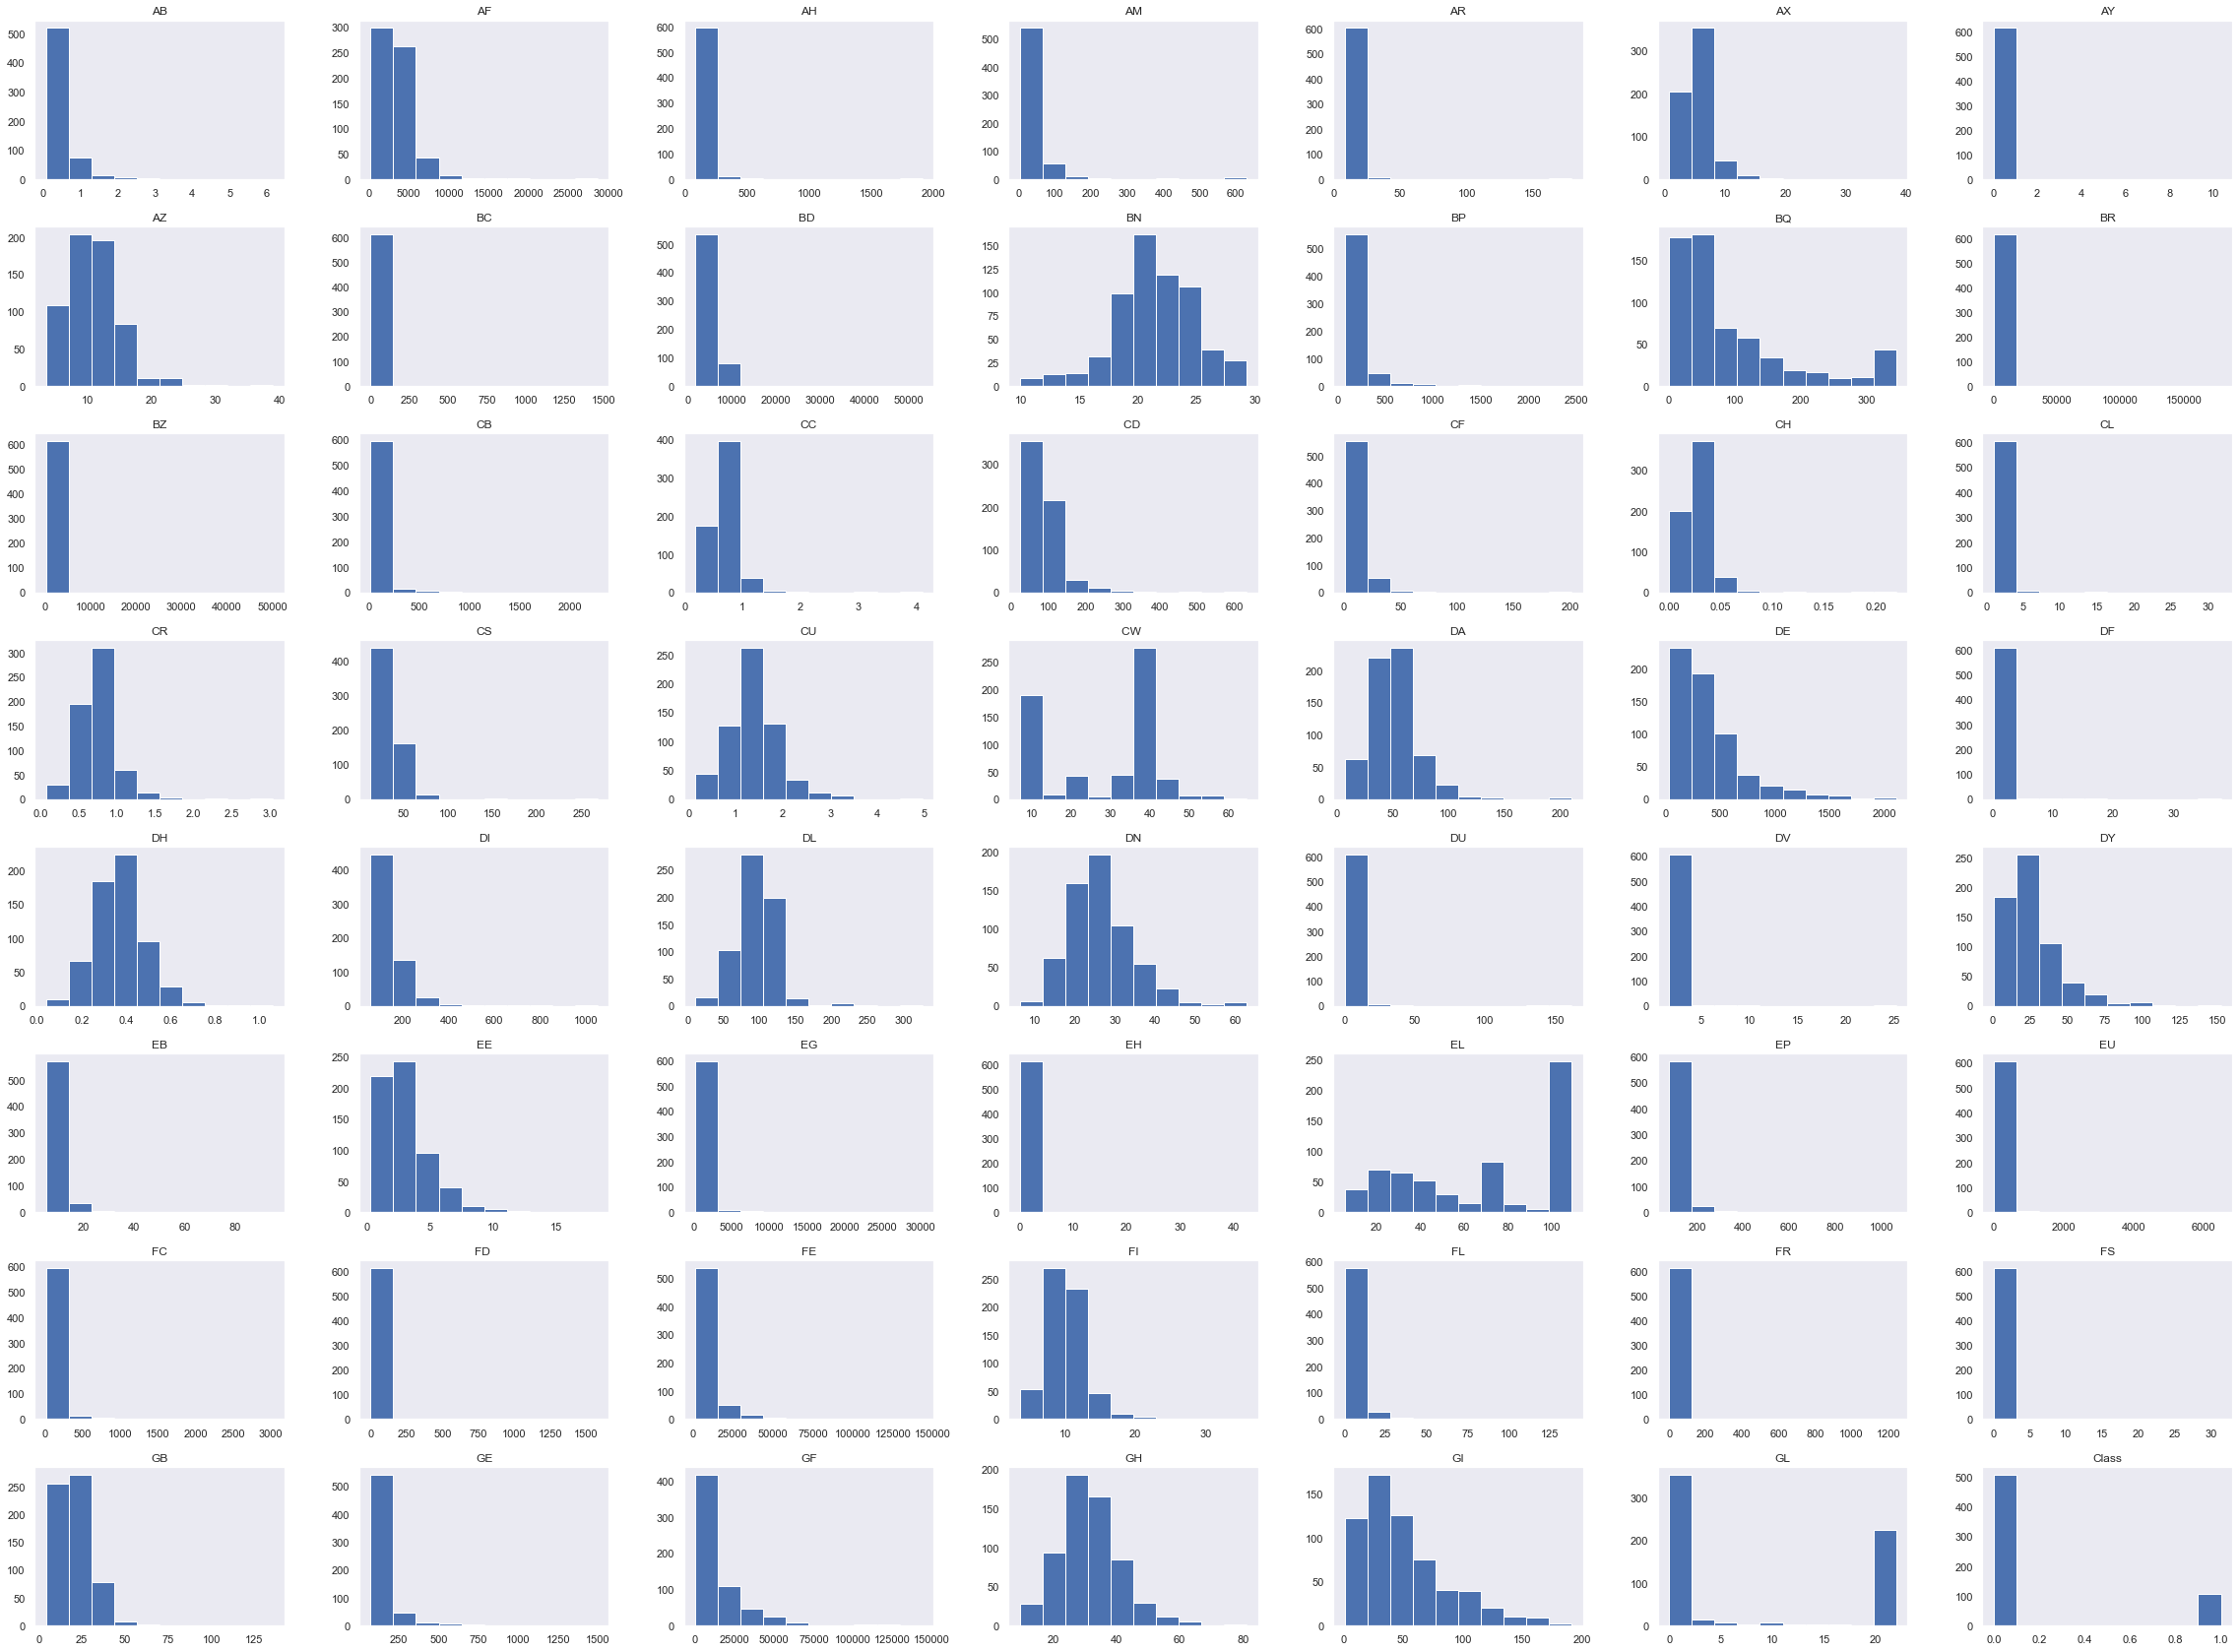

In [313]:
# let's visualize the distribution of the features
data.hist(figsize=(40,30),bins=10, grid=False)
plt.show()

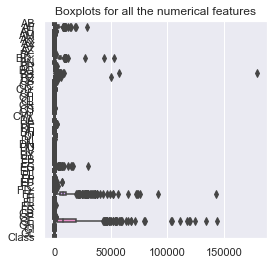

In [314]:
# let's visualize the boxplot for each of the numerical attributes
sns.boxplot(data=data, orient="h")
sns.set(rc={"figure.figsize":(13, 15)})
# Display
plt.title("Boxplots for all the numerical features")
plt.show()

In [315]:
# FE, GF, EG, BR, BZ, BD, AF with outliers

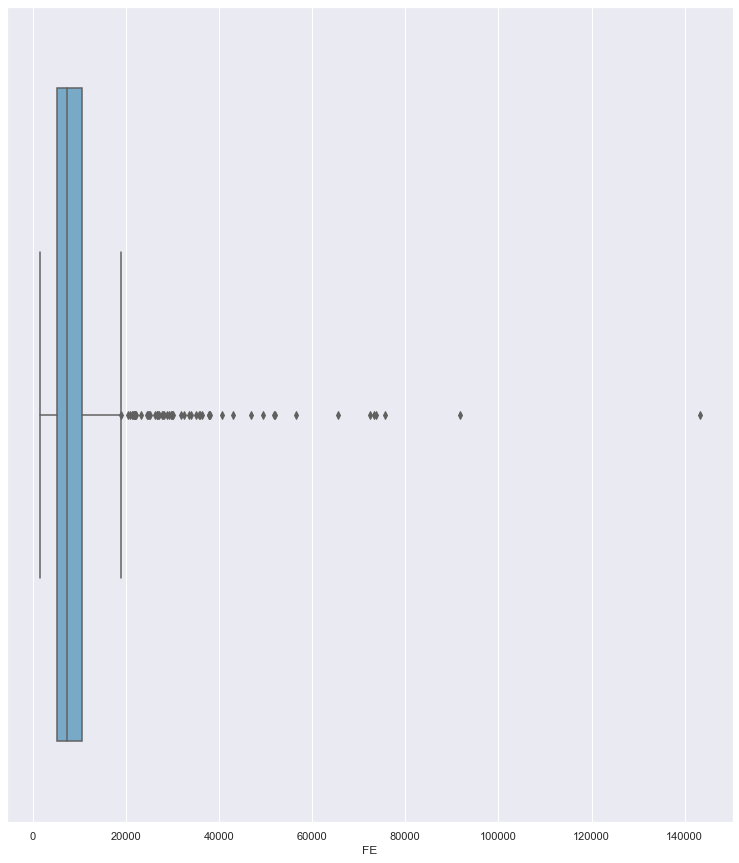

In [316]:
sns.boxplot(data = data, x = 'FE', palette="Blues")
sns.set(rc={"figure.figsize":(4,4)})
# Display
plt.show()


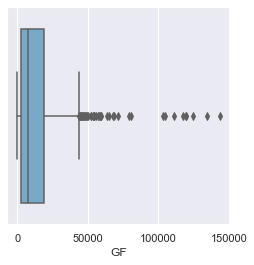

In [317]:

sns.boxplot(data = data, x = 'GF', palette="Blues")
sns.set(rc={"figure.figsize":(6, 4)})
# Display
plt.show()

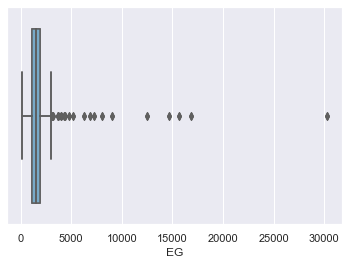

In [318]:
sns.boxplot(data = data, x = 'EG')
sns.boxplot(data = data, x = 'EG', palette="Blues")
sns.set(rc={"figure.figsize":(6, 4)})
# Display
plt.show()

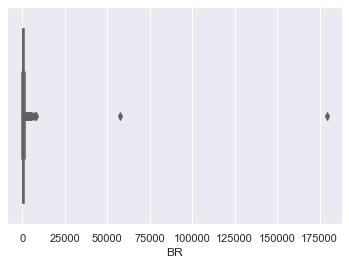

In [319]:
sns.boxplot(data = data, x = 'BR', palette="Blues")
sns.set(rc={"figure.figsize":(9,5)})
# Display
plt.show()


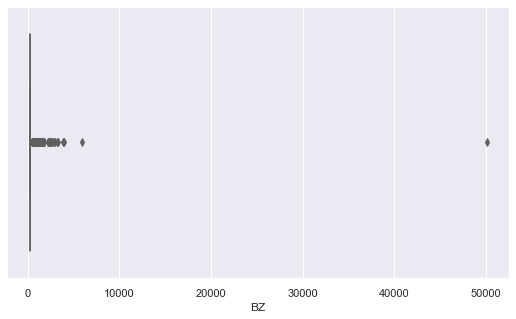

In [320]:
sns.boxplot(data = data, x = 'BZ', palette="Blues")
sns.set(rc={"figure.figsize":(6,3)})
# Display
plt.show()


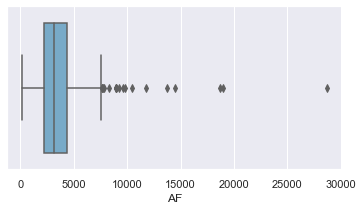

In [321]:
sns.boxplot(data = data, x = 'AF', palette="Blues")
sns.set(rc={"figure.figsize":(6,3)})
# Display
plt.show()


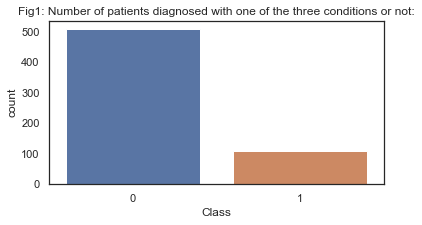

In [322]:
sns.set_style("white")
sns.countplot(data['Class'])
plt.title("Fig1: Number of patients diagnosed with one of the three conditions or not:" )
plt.show()

In [323]:
data.to_excel("EDA_results.xlsx", index=False)

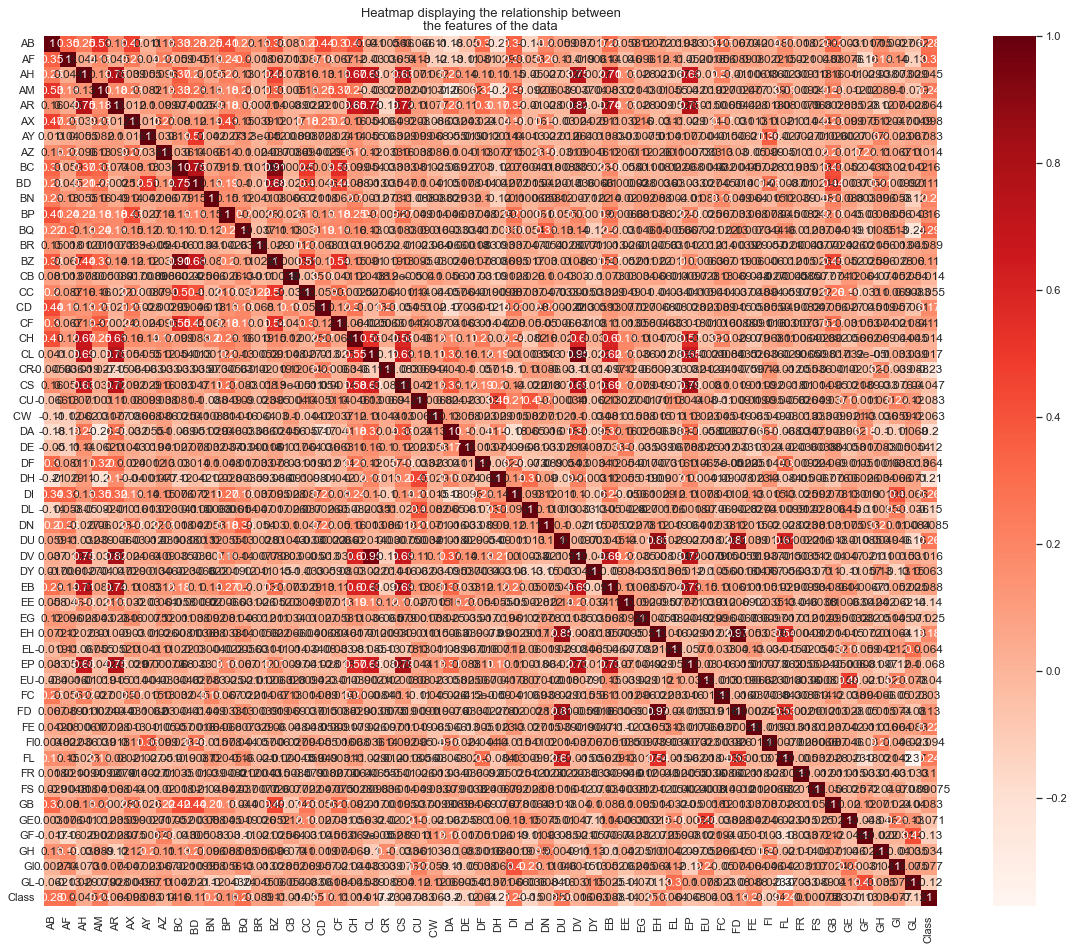

In [324]:
# Let's visualize the relationships between the features
#.... the other features.
plt.figure(figsize=(20,16))
sns.heatmap(data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',
         fontsize=13)
plt.show()

In [325]:
data.corr().round(2)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
AB,1.00,0.35,0.25,0.53,0.16,0.47,0.01,0.16,0.33,0.28,...,0.17,0.02,0.03,0.32,0.00,-0.02,0.15,0.00,-0.06,0.28
AF,0.35,1.00,0.04,0.18,0.04,0.25,0.04,0.22,0.06,0.05,...,0.15,0.02,-0.00,0.08,0.08,-0.16,0.19,0.14,-0.13,0.30
AH,0.25,0.04,1.00,0.13,0.75,0.04,0.06,0.10,0.37,0.21,...,-0.02,-0.01,0.02,0.16,0.01,-0.03,-0.04,-0.07,0.03,0.04
AM,0.53,0.18,0.13,1.00,0.18,0.23,0.08,0.13,0.33,0.28,...,0.19,-0.01,0.04,0.22,-0.01,-0.02,0.09,0.10,-0.08,0.24
AR,0.16,0.04,0.75,0.18,1.00,0.01,0.10,0.10,0.07,-0.00,...,0.08,-0.01,0.07,0.00,0.03,0.03,-0.12,0.07,0.03,0.06
AX,0.47,0.25,0.04,0.23,0.01,1.00,0.02,0.27,0.08,0.12,...,0.02,-0.01,0.04,0.23,0.10,0.08,0.12,0.05,-0.00,0.10
AY,0.01,0.04,0.06,0.08,0.10,0.02,1.00,0.04,0.13,0.51,...,-0.03,-0.00,-0.01,0.03,0.00,-0.01,0.20,0.02,0.07,0.08
AZ,0.16,0.22,0.10,0.13,0.10,0.27,0.04,1.00,0.04,0.14,...,-0.05,-0.01,0.02,0.22,0.02,0.22,0.11,0.07,0.11,0.01
BC,0.33,0.06,0.37,0.33,0.07,0.08,0.13,0.04,1.00,0.75,...,-0.02,0.03,0.02,0.42,0.05,-0.04,0.13,-0.02,0.04,0.16
BD,0.28,0.05,0.21,0.28,-0.00,0.12,0.51,0.14,0.75,1.00,...,-0.01,-0.01,0.02,0.44,-0.00,0.01,0.21,-0.01,0.02,0.11


In [326]:
# Label Encoding
c = data.Beta.astype('category')

beta_dict = dict(enumerate(c.cat.categories))
#print (beta_dict)

data['Beta'] = data.Beta.astype('category').cat.codes

data['Beta_OLD'] = data['Beta'].map(beta_dict)
print (data)



               Id    AB       AF      AH      AM     AR    AX    AY     AZ  \
0    000ff2bfdfe9  0.21  3109.03   85.20   22.39   8.14  0.70  0.03   9.81   
1    007255e47698  0.15   978.76   85.20   36.97   8.14  3.63  0.03  13.52   
2    013f2bd269f5  0.47  2635.11   85.20   32.36   8.14  6.73  0.03  12.82   
3    043ac50845d5  0.25  3819.65  120.20   77.11   8.14  3.69  0.03  11.05   
4    044fb8a146ec  0.38  3733.05   85.20   14.10   8.14  3.94  0.05   3.40   
..            ...   ...      ...     ...     ...    ...   ...   ...    ...   
612  fd3dafe738fd  0.15  3130.06  123.76    9.51  13.02  3.50  0.08   8.55   
613  fd895603f071  0.44  5462.03   85.20   46.55  15.97  5.98  0.03  12.62   
614  fd8ef6377f76  0.43  2459.11  130.14   55.36  10.01  8.07  0.03  15.41   
615  fe1942975e40  0.36  1263.54   85.20   23.69   8.14  7.98  0.03   7.52   
616  ffcca4ded3bb  0.48  2672.53  546.66  112.01   8.14  3.20  0.12   3.40   

         BC  ...     GH      GI     GL  Class  Alpha  Beta  Gam

In [327]:
c = data.Gamma.astype('category')

gamma_dict = dict(enumerate(c.cat.categories))
#print (beta_dict)

data['Gamma'] = data.Gamma.astype('category').cat.codes

data['Gamma_OLD'] = data['Gamma'].map(gamma_dict)
print (data)

               Id    AB       AF      AH      AM     AR    AX    AY     AZ  \
0    000ff2bfdfe9  0.21  3109.03   85.20   22.39   8.14  0.70  0.03   9.81   
1    007255e47698  0.15   978.76   85.20   36.97   8.14  3.63  0.03  13.52   
2    013f2bd269f5  0.47  2635.11   85.20   32.36   8.14  6.73  0.03  12.82   
3    043ac50845d5  0.25  3819.65  120.20   77.11   8.14  3.69  0.03  11.05   
4    044fb8a146ec  0.38  3733.05   85.20   14.10   8.14  3.94  0.05   3.40   
..            ...   ...      ...     ...     ...    ...   ...   ...    ...   
612  fd3dafe738fd  0.15  3130.06  123.76    9.51  13.02  3.50  0.08   8.55   
613  fd895603f071  0.44  5462.03   85.20   46.55  15.97  5.98  0.03  12.62   
614  fd8ef6377f76  0.43  2459.11  130.14   55.36  10.01  8.07  0.03  15.41   
615  fe1942975e40  0.36  1263.54   85.20   23.69   8.14  7.98  0.03   7.52   
616  ffcca4ded3bb  0.48  2672.53  546.66  112.01   8.14  3.20  0.12   3.40   

         BC  ...      GI     GL  Class  Alpha  Beta  Gamma  Del

In [328]:
c = data.Delta.astype('category')

delta_dict = dict(enumerate(c.cat.categories))
print (delta_dict)

data['Delta'] = data.Delta.astype('category').cat.codes

data['Delta_OLD'] = data['Delta'].map(delta_dict)
print (data)

{0: 'A', 1: 'B', 2: 'C', 3: 'D'}
               Id    AB       AF      AH      AM     AR    AX    AY     AZ  \
0    000ff2bfdfe9  0.21  3109.03   85.20   22.39   8.14  0.70  0.03   9.81   
1    007255e47698  0.15   978.76   85.20   36.97   8.14  3.63  0.03  13.52   
2    013f2bd269f5  0.47  2635.11   85.20   32.36   8.14  6.73  0.03  12.82   
3    043ac50845d5  0.25  3819.65  120.20   77.11   8.14  3.69  0.03  11.05   
4    044fb8a146ec  0.38  3733.05   85.20   14.10   8.14  3.94  0.05   3.40   
..            ...   ...      ...     ...     ...    ...   ...   ...    ...   
612  fd3dafe738fd  0.15  3130.06  123.76    9.51  13.02  3.50  0.08   8.55   
613  fd895603f071  0.44  5462.03   85.20   46.55  15.97  5.98  0.03  12.62   
614  fd8ef6377f76  0.43  2459.11  130.14   55.36  10.01  8.07  0.03  15.41   
615  fe1942975e40  0.36  1263.54   85.20   23.69   8.14  7.98  0.03   7.52   
616  ffcca4ded3bb  0.48  2672.53  546.66  112.01   8.14  3.20  0.12   3.40   

         BC  ...     GL  Class

In [329]:
c = data.EJ.astype('category')

EJ_dict = dict(enumerate(c.cat.categories))

data['EJ'] = data.EJ.astype('category').cat.codes

data['EJ_OLD'] = data['EJ'].map(EJ_dict)
print (data)

               Id    AB       AF      AH      AM     AR    AX    AY     AZ  \
0    000ff2bfdfe9  0.21  3109.03   85.20   22.39   8.14  0.70  0.03   9.81   
1    007255e47698  0.15   978.76   85.20   36.97   8.14  3.63  0.03  13.52   
2    013f2bd269f5  0.47  2635.11   85.20   32.36   8.14  6.73  0.03  12.82   
3    043ac50845d5  0.25  3819.65  120.20   77.11   8.14  3.69  0.03  11.05   
4    044fb8a146ec  0.38  3733.05   85.20   14.10   8.14  3.94  0.05   3.40   
..            ...   ...      ...     ...     ...    ...   ...   ...    ...   
612  fd3dafe738fd  0.15  3130.06  123.76    9.51  13.02  3.50  0.08   8.55   
613  fd895603f071  0.44  5462.03   85.20   46.55  15.97  5.98  0.03  12.62   
614  fd8ef6377f76  0.43  2459.11  130.14   55.36  10.01  8.07  0.03  15.41   
615  fe1942975e40  0.36  1263.54   85.20   23.69   8.14  7.98  0.03   7.52   
616  ffcca4ded3bb  0.48  2672.53  546.66  112.01   8.14  3.20  0.12   3.40   

         BC  ...  Class  Alpha  Beta  Gamma  Delta    Epsilon  

In [330]:
data["Epsilon"] = data["Epsilon"].replace('Unknown', date.today())

In [331]:
data["Epsilon"] = pd.to_datetime(data["Epsilon"] )

In [332]:
from datetime import date
data.Age = pd.to_datetime(date.today())- data.Epsilon
#print(data.Age)
data['Age'] = (data.Age).dt.days.astype('int64')
data['Age']


0      1581
1         0
2         0
3         0
4      1209
       ... 
612    1037
613    1042
614    1454
615    1628
616       0
Name: Age, Length: 617, dtype: int64

In [333]:
# Alpha is equal to class as per the definaition of ALpha. So, dropping Alpha and Alpha_OLD
data['Alpha_OLD']=data.Alpha
data['Alpha_OLD']= data.Alpha_OLD.replace(['B','D','G'], 1)

In [334]:
data["Alpha_OLD"] = data.Alpha_OLD.replace('A', 0)

In [335]:
# Alpha and class comparision
data['Class'].equals(data.Alpha_OLD)

True

In [336]:

# subset all categorical variables
df_categorical = data.select_dtypes(include=['object', 'datetime64[ns]'])
df_categorical.dtypes

Id                   object
Alpha                object
Epsilon      datetime64[ns]
Beta_OLD             object
Gamma_OLD            object
Delta_OLD            object
EJ_OLD               object
dtype: object

In [337]:

data= data.drop(['Alpha'], axis=1)

data= data.drop(['Alpha_OLD'], axis=1)

In [338]:

data= data.drop(['Id'], axis=1)
data= data.drop(['Epsilon'], axis=1)
data= data.drop(['Beta_OLD'], axis=1)
data= data.drop(['Gamma_OLD'], axis=1)
data= data.drop(['Delta_OLD'], axis=1)
data= data.drop(['EJ_OLD'], axis=1)

In [339]:

# subset all categorical variables
df_categorical = data.select_dtypes(include=['object', 'datetime64[ns]'])
df_categorical.head()

""
0
1
2
3
4


In [340]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [341]:
calc_vif(data).sort_values(by='VIF')

,variables,VIF
48,FR,1.072057
49,FS,1.225624
13,BR,1.308882
15,CB,1.490316
42,EU,1.512776
...,...,...
55,GL,32.663716
33,DV,51.820455
10,BN,54.689066
39,EJ,55.212414


In [342]:
data= data.drop(['Gamma'], axis=1)
calc_vif(data).sort_values(by='VIF')

,variables,VIF
48,FR,1.070824
49,FS,1.225183
13,BR,1.247802
15,CB,1.484863
42,EU,1.512667
43,FC,1.713366
27,DF,1.936808
37,EG,2.175383
45,FE,2.300255
6,AY,2.524032


In [343]:
data= data.drop(['BN'], axis=1)
calc_vif(data).sort_values(by='VIF')

,variables,VIF
47,FR,1.065129
48,FS,1.222208
12,BR,1.247456
14,CB,1.479830
41,EU,1.510782
42,FC,1.694034
26,DF,1.933634
36,EG,2.168124
44,FE,2.281346
6,AY,2.507348


In [344]:
data= data.drop(['DV'], axis=1)
calc_vif(data).sort_values(by='VIF')

,variables,VIF
46,FR,1.064888
47,FS,1.222175
12,BR,1.246324
14,CB,1.474296
40,EU,1.506734
41,FC,1.669092
26,DF,1.932655
35,EG,2.165574
43,FE,2.279667
6,AY,2.504865


In [345]:
data= data.drop(['EJ'], axis=1)
calc_vif(data).sort_values(by='VIF')

,variables,VIF
45,FR,1.058407
46,FS,1.220356
12,BR,1.246283
14,CB,1.471293
39,EU,1.506597
40,FC,1.669073
26,DF,1.932002
35,EG,2.147314
42,FE,2.241182
6,AY,2.456315


In [346]:
data= data.drop(['EH'], axis=1)
calc_vif(data).sort_values(by='VIF')

,variables,VIF
44,FR,1.058388
45,FS,1.217721
12,BR,1.245756
14,CB,1.470356
38,EU,1.503489
39,FC,1.668092
26,DF,1.931410
41,FE,2.100114
35,EG,2.147122
6,AY,2.435788


In [347]:
data= data.drop(['Beta'], axis=1)
calc_vif(data).sort_values(by='VIF')

,variables,VIF
44,FR,1.055639
45,FS,1.216323
12,BR,1.243597
14,CB,1.468025
38,EU,1.494700
39,FC,1.665245
26,DF,1.922059
41,FE,2.096347
35,EG,2.145019
6,AY,2.389863


In [348]:
data= data.drop(['CS'], axis=1)
calc_vif(data).sort_values(by='VIF')

,variables,VIF
43,FR,1.055459
44,FS,1.214900
12,BR,1.243597
14,CB,1.467613
37,EU,1.494272
38,FC,1.653742
25,DF,1.913989
40,FE,2.085087
34,EG,2.142582
6,AY,2.303167


In [349]:
data= data.drop(['DH'], axis=1)
calc_vif(data).sort_values(by='VIF')

,variables,VIF
42,FR,1.055409
43,FS,1.213717
12,BR,1.232609
14,CB,1.461710
36,EU,1.493869
37,FC,1.650338
25,DF,1.906606
39,FE,2.084846
33,EG,2.142520
6,AY,2.247079


In [350]:
data=data.drop(data.columns[[7]], axis=1)
calc_vif(data).sort_values(by='VIF')

,variables,VIF
41,FR,1.054447
42,FS,1.213711
11,BR,1.229428
13,CB,1.461589
35,EU,1.492238
36,FC,1.647646
24,DF,1.879307
38,FE,2.077239
32,EG,2.137844
6,AY,2.235933


In [351]:
data= data.drop(['FI'], axis=1)
calc_vif(data).sort_values(by='VIF')

,variables,VIF
40,FR,1.053755
41,FS,1.211217
11,BR,1.220717
13,CB,1.460402
35,EU,1.491468
36,FC,1.647589
24,DF,1.878404
38,FE,2.066782
32,EG,2.135904
6,AY,2.182498


In [352]:
data= data.drop(['CH'], axis=1)
calc_vif(data).sort_values(by='VIF')

,variables,VIF
39,FR,1.048163
40,FS,1.208265
11,BR,1.220680
13,CB,1.458898
34,EU,1.490740
35,FC,1.638927
23,DF,1.868997
37,FE,2.060406
31,EG,2.116491
6,AY,2.140902


In [353]:
data= data.drop(['DN'], axis=1)
calc_vif(data).sort_values(by='VIF')

,variables,VIF
38,FR,1.047151
39,FS,1.200703
11,BR,1.213010
13,CB,1.458600
33,EU,1.490654
34,FC,1.638660
23,DF,1.859410
36,FE,2.044017
6,AY,2.071915
30,EG,2.107481


In [354]:
data= data.drop(['DL'], axis=1)
calc_vif(data).sort_values(by='VIF')

,variables,VIF
37,FR,1.041092
11,BR,1.197482
38,FS,1.200579
13,CB,1.458216
32,EU,1.487898
33,FC,1.636037
23,DF,1.859346
35,FE,2.042038
6,AY,2.053802
29,EG,2.107082


In [355]:
data= data.drop(['GH'], axis=1)
calc_vif(data).sort_values(by='VIF')

,variables,VIF
37,FR,1.039844
11,BR,1.196269
38,FS,1.200446
13,CB,1.446110
32,EU,1.487647
33,FC,1.628301
23,DF,1.858523
35,FE,2.035517
6,AY,2.044763
29,EG,2.104201


In [356]:
data= data.drop(['EB'], axis=1)
calc_vif(data).sort_values(by='VIF')

,variables,VIF
36,FR,1.038023
11,BR,1.192850
37,FS,1.199079
31,EU,1.438078
13,CB,1.446074
32,FC,1.623315
23,DF,1.835150
34,FE,2.033366
6,AY,2.044436
28,EG,2.103590


In [357]:
data= data.drop(['AR'], axis=1)
calc_vif(data).sort_values(by='VIF')

,variables,VIF
35,FR,1.037991
36,FS,1.189420
10,BR,1.192640
30,EU,1.433849
12,CB,1.440732
31,FC,1.564511
22,DF,1.753333
5,AY,2.028523
33,FE,2.031683
27,EG,2.103586


In [358]:
data= data.drop(['CC'], axis=1)
calc_vif(data).sort_values(by='VIF')

,variables,VIF
34,FR,1.035306
10,BR,1.087172
35,FS,1.189332
29,EU,1.420619
12,CB,1.433598
30,FC,1.563233
21,DF,1.751963
5,AY,1.949342
32,FE,2.030089
26,EG,2.103475


In [359]:
data= data.drop(['AX'], axis=1)
calc_vif(data).sort_values(by='VIF')

,variables,VIF
33,FR,1.035216
9,BR,1.087119
34,FS,1.188934
28,EU,1.417563
11,CB,1.430803
29,FC,1.543421
20,DF,1.735307
4,AY,1.949115
31,FE,2.029554
25,EG,2.081703


In [360]:
# Modeling Preparation
y = data['Class']
x = data.drop(['Class'], axis = 1)

In [361]:
print(x.head())

     AB       AF     AH     AM    AY      BC      BD       BP      BQ  \
0  0.21  3109.03   85.2  22.39  0.03    5.56  4126.59  175.64  152.71   
1  0.15   978.76   85.2  36.97  0.03    1.23  5496.93  155.87   14.75   
2  0.47  2635.11   85.2  32.36  0.03    1.23  5135.78  128.99  219.32   
3  0.25  3819.65  120.2  77.11  0.03    1.23  4169.68  237.28   11.05   
4  0.38  3733.05   85.2  14.10  0.05  102.15  5728.73  324.55  149.72   

        BR  ...    FL     FR    FS     GB      GE        GF     GI     GL  \
0   823.93  ...  7.30   1.74  0.09  11.34   72.61   2003.81  69.83   0.12   
1    51.22  ...  0.17   0.50  0.57   9.29   72.61  27981.56  32.13  21.98   
2   482.14  ...  7.71   0.98  1.20  37.08   88.61  13676.96  35.19   0.20   
3   661.52  ...  6.12   0.50  0.28  18.53   82.42   2094.26  90.49   0.16   
4  6074.86  ...  8.15  48.50  0.12  16.41  146.11   8524.37  36.26   0.10   

   Delta   Age  
0      3  1581  
1      1     0  
2      1     0  
3      1     0  
4      1  120

In [362]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [363]:
# Feature before mean normalization
unscaled_features = x_train
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_array = sc.fit_transform(x_train.values)
# Assign the scaled data to a DataFrame and use the index and columns arguments to keep original indices and column names:
x_train = pd.DataFrame(x_train_array, index= x_train.index, columns= x_train.columns)
x_test_array = sc.transform(x_test.values)
x_test = pd.DataFrame(x_test_array, index= x_test.index, columns= x_test.columns)


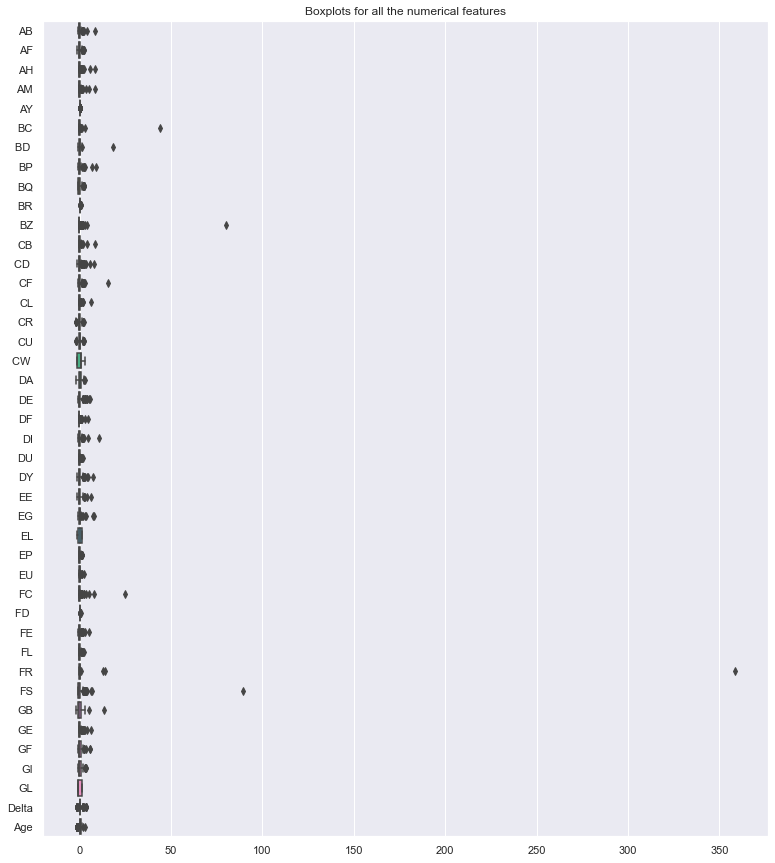

In [385]:
# let's visualize the boxplot for each of the numerical attributes
sns.boxplot(data=x_test, orient="h")
sns.set(rc={"figure.figsize":(12, 15)})
# Display
plt.title("Boxplots for all the numerical features")
plt.show()

In [364]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
log_model = sm.Logit(y_train, x_train).fit()
print(log_model.summary())

Optimization terminated successfully.
         Current function value: 0.241860
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  431
Model:                          Logit   Df Residuals:                      389
Method:                           MLE   Df Model:                           41
Date:                Mon, 17 Jul 2023   Pseudo R-squ.:                  0.4923
Time:                        07:41:43   Log-Likelihood:                -104.24
converged:                       True   LL-Null:                       -205.31
Covariance Type:            nonrobust   LLR p-value:                 3.599e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AB             0.1931      0.369      0.523      0.601      -0.531       0.917
AF            -0.2211      0

In [365]:
p_val = pd.DataFrame(log_model.pvalues, columns=['p_value'])
coef = pd.DataFrame(log_model.params, columns= ['coef'])
p_coef = pd.concat([coef, p_val], axis = 1)
p_coef

,coef,p_value
AB,0.193100,0.601049
AF,-0.221089,0.461864
AH,0.425690,0.315661
AM,-0.115584,0.625518
AY,13.880254,0.000688
BC,2.941751,0.067205
BD,-0.760845,0.060350
BP,0.499578,0.096871
BQ,0.428818,0.041607
BR,0.163478,0.709791


In [366]:
print(p_coef[p_coef['p_value'] < 0.05].sort_values('coef', ascending=False))

          coef   p_value
FD   19.432294  0.000018
AY   13.880254  0.000688
FR    3.364647  0.010938
DI    1.090833  0.004234
Age   0.754499  0.001982
CD    0.583396  0.015989
BQ    0.428818  0.041607
GI   -0.511854  0.041657
CU   -0.538028  0.032958
CR   -0.964711  0.001582
EP   -2.996715  0.000007


In [367]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# Classification Report and Confusion Matrix
LogisticRegression()
model=LogisticRegression(solver='liblinear',random_state=0).fit(x_train,y_train)
y_pred=model.predict(x_test)

print("Confusion Matrix\n",confusion_matrix(y_test, model.predict(x_test)))

Confusion Matrix
 [[151   6]
 [ 16  13]]


In [368]:
print("Classification Report\n",classification_report(y_test, model.predict(x_test)))

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       157
           1       0.68      0.45      0.54        29

    accuracy                           0.88       186
   macro avg       0.79      0.71      0.74       186
weighted avg       0.87      0.88      0.87       186



In [369]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy: 0.882
Precision: 0.684
Recall: 0.448


In [370]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)

MSE: 0.118


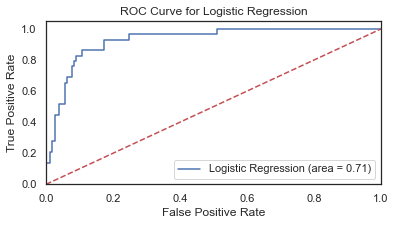

In [371]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [372]:
!pip install mlxtend

In [373]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [374]:
log_reg = LogisticRegression()
sfs1 = sfs(log_reg, k_features=10, forward=True, verbose = 2, scoring='accuracy', cv = 5)
sfs1 = sfs1.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.8s finished

[2023-07-17 07:41:49] Features: 1/10 -- score: 0.8353114140604116[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished

[2023-07-17 07:41:50] Features: 2/10 -- score: 0.8491847099705959[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.1s finished

[2023-07-17 07:41:51] Features: 3/10 -- score: 0.8631114675220528[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [375]:
sig_cols = list(sfs1.k_feature_names_)
print(sig_cols)

['AM', 'BR', 'BZ', 'CB', 'CL', 'DI', 'DU', 'EP', 'FR', 'Age']


In [376]:
log_reg_1 = LogisticRegression()
model = log_reg_1.fit(x_train[sig_cols], y_train)
print(confusion_matrix(y_test, model.predict(x_test[sig_cols])))
print(classification_report(y_test, model.predict(x_test[sig_cols])))
print('Accuracy: %.3f' % accuracy_score(y_test, model.predict(x_test[sig_cols])))

[[155   2]
 [ 18  11]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       157
           1       0.85      0.38      0.52        29

    accuracy                           0.89       186
   macro avg       0.87      0.68      0.73       186
weighted avg       0.89      0.89      0.87       186

Accuracy: 0.892


In [377]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, model.predict(x_test[sig_cols])))
print('Precision: %.3f' % precision_score(y_test, model.predict(x_test[sig_cols])))
print('Recall: %.3f' % recall_score(y_test, model.predict(x_test[sig_cols])))

Accuracy: 0.892
Precision: 0.846
Recall: 0.379


In [378]:
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)

MSE: 0.118


In [379]:
# Random Forest
rfclass=RandomForestClassifier(n_estimators=100, random_state=0)
rfclass.fit(x_train, y_train)
rfypred=rfclass.predict(x_test)
#x_train

In [380]:
print("Accuracy: ", accuracy_score(y_test, rfypred))
#rfclass.score(x_test, y_test)
print("Confusion Matrix\n",confusion_matrix(y_test, rfypred))

Accuracy:  0.9247311827956989
Confusion Matrix
 [[153   4]
 [ 10  19]]


In [381]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, rfypred)
print('MSE: %.3f' % mse)

MSE: 0.075


Text(0.5, 0, 'Random Forest Feature Importance')

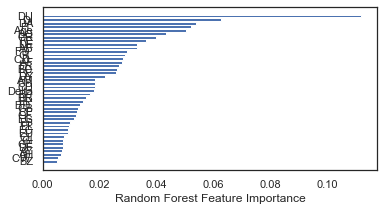

In [382]:
sorted_idx = rfclass.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx], rfclass.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [383]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, rfypred))
print('Precision: %.3f' % precision_score(y_test, rfypred))
print('Recall: %.3f' % recall_score(y_test, rfypred))

Accuracy: 0.925
Precision: 0.826
Recall: 0.655
